In [2]:
import komm
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid": True, "font.size": 14})

In [50]:
data = np.random.randint(0, 1, 2 * 3 * 4 * 5 * 10000)
snrs = np.arange(-20, 40, 2)

psk_orders = [4, 8, 16, 32]
psk_ber = np.zeros((len(psk_orders), len(snrs)))

for i, M in enumerate(psk_orders):
    psk_modulation = komm.PSKModulation(M)

    psk_symbols = psk_modulation.modulate(data)

    for j, snr in enumerate(snrs):
        snr_linear = 10 ** (snr / 10)
        awg_channel = komm.AWGNChannel(snr=snr_linear, signal_power=1)

        psk_noisy = awg_channel(psk_symbols)

        psk_demodulated = psk_modulation.demodulate(psk_noisy)

        psk_ber[i, j] = np.bitwise_xor(psk_demodulated, data).sum() / len(data)

qam_orders = [4, 16, 64, 256]
qam_ber = np.zeros((len(qam_orders), len(snrs)))

for i, M in enumerate(qam_orders):
    qam_modulation = komm.QAModulation(M)

    qam_symbols = qam_modulation.modulate(data)

    for j, snr in enumerate(snrs):
        snr_linear = 10 ** (snr / 10)
        awg_channel = komm.AWGNChannel(snr=snr_linear, signal_power=1)

        qam_noisy = awg_channel(qam_symbols)

        qam_demodulated = qam_modulation.demodulate(qam_noisy)

        qam_ber[i, j] = np.bitwise_xor(qam_demodulated, data).sum() / len(data)

# M-PSK

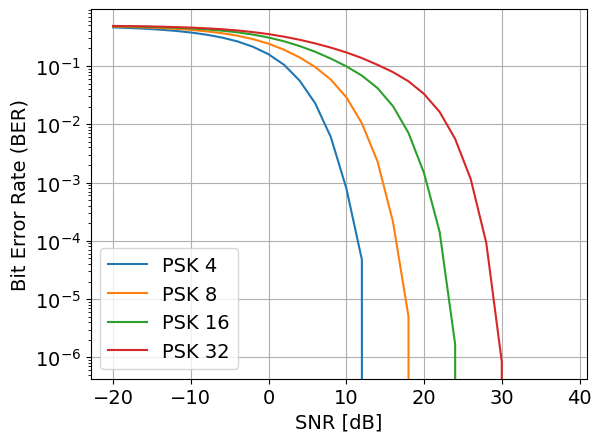

In [51]:
fig, ax = plt.subplots()

for i, M in enumerate(psk_orders):
    ax.semilogy(snrs, psk_ber[i], label=f"PSK {M}")

ax.set_xlabel("SNR [dB]")
ax.set_ylabel("Bit Error Rate (BER)")

ax.legend()

plt.show()

# M-QAM

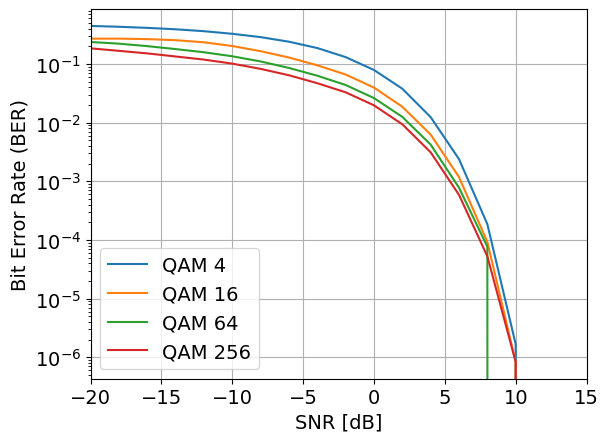

In [53]:
fig, ax = plt.subplots()

for i, M in enumerate(qam_orders):
    ax.semilogy(snrs, qam_ber[i], label=f"QAM {M}")

ax.set_xlim(-20, 15)

ax.set_xlabel("SNR [dB]")
ax.set_ylabel("Bit Error Rate (BER)")

ax.legend()

plt.show()

# PSK vs QAM

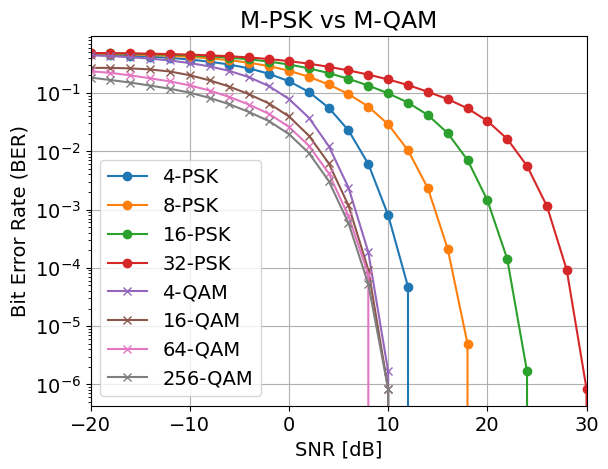

In [54]:
fig, ax = plt.subplots()

for i, M in enumerate(psk_orders):
    ax.semilogy(snrs, psk_ber[i], "-o", label=f"{M}-PSK")

for i, M in enumerate(qam_orders):
    ax.semilogy(snrs, qam_ber[i], "-x", label=f"{M}-QAM")

ax.set_xlim(-20, 30)

ax.set_title("M-PSK vs M-QAM")

ax.set_xlabel("SNR [dB]")
ax.set_ylabel("Bit Error Rate (BER)")

ax.legend()

plt.show()